In [43]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
#nltk.download()
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
import pickle

In [44]:
train_data = pd.read_csv("E:/NLP/train.csv")

In [45]:
train_data

id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...       1  
7610  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...       1  
7611  Police investigating after an e-bike collided ...       1  
7612  The Latest: More Homes Razed by Northern Calif...       1  

[7613 rows x 5 columns]

In [46]:
y = train_data["target"]

In [47]:
X = train_data["text"]
X

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [48]:
X = X.str.lower()
X

0       our deeds are the reason of this #earthquake m...
1                  forest fire near la ronge sask. canada
2       all residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       just got sent this photo from ruby #alaska as ...
                              ...                        
7608    two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @thetawniest the out of control w...
7610    m1.94 [01:04 utc]?5km s of volcano hawaii. htt...
7611    police investigating after an e-bike collided ...
7612    the latest: more homes razed by northern calif...
Name: text, Length: 7613, dtype: object

In [49]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [50]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(X):
    return " ".join([word for word in str(X).split() if word not in STOPWORDS])
X = X.apply(lambda x: cleaning_stopwords(x))
X

0           deeds reason #earthquake may allah forgive us
1                  forest fire near la ronge sask. canada
2       residents asked 'shelter place' notified offic...
3       13,000 people receive #wildfires evacuation or...
4       got sent photo ruby #alaska smoke #wildfires p...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    @aria_ahrary @thetawniest control wild fires c...
7610    m1.94 [01:04 utc]?5km volcano hawaii. http://t...
7611    police investigating e-bike collided car littl...
7612    latest: homes razed northern california wildfi...
Name: text, Length: 7613, dtype: object

In [51]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(X):
    translator = str.maketrans('', '', punctuations_list)
    return X.translate(translator)
X= X.apply(lambda x: cleaning_punctuations(x))
X

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3       13000 people receive wildfires evacuation orde...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    ariaahrary thetawniest control wild fires cali...
7610    m194 0104 utc5km volcano hawaii httptcozdtoyd8ebj
7611    police investigating ebike collided car little...
7612    latest homes razed northern california wildfir...
Name: text, Length: 7613, dtype: object

In [52]:
def cleaning_repeating_char(X):
    return re.sub(r'(.)\1+', r'\1', X)
X = X.apply(lambda x: cleaning_repeating_char(x))
X

0              deds reason earthquake may alah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified oficers...
3       130 people receive wildfires evacuation orders...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge colapse nearby...
7609    ariahrary thetawniest control wild fires calif...
7610      m194 0104 utc5km volcano hawai htptcozdtoyd8ebj
7611    police investigating ebike colided car litle p...
7612    latest homes razed northern california wildfir...
Name: text, Length: 7613, dtype: object

In [53]:
def cleaning_URLs(X):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',X)
X = X.apply(lambda x: cleaning_URLs(x))
X

0              deds reason earthquake may alah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified oficers...
3       130 people receive wildfires evacuation orders...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge colapse nearby...
7609    ariahrary thetawniest control wild fires calif...
7610      m194 0104 utc5km volcano hawai htptcozdtoyd8ebj
7611    police investigating ebike colided car litle p...
7612    latest homes razed northern california wildfir...
Name: text, Length: 7613, dtype: object

In [54]:
def cleaning_numbers(X):
    return re.sub('[0-9]+', '', X)
X = X.apply(lambda x: cleaning_numbers(x))
X

0              deds reason earthquake may alah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified oficers...
3        people receive wildfires evacuation orders ca...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge colapse nearby...
7609    ariahrary thetawniest control wild fires calif...
7610               m  utckm volcano hawai htptcozdtoydebj
7611    police investigating ebike colided car litle p...
7612    latest homes razed northern california wildfir...
Name: text, Length: 7613, dtype: object

In [55]:
tokenizer = RegexpTokenizer('\s+', gaps=True)
X = X.apply(tokenizer.tokenize)
X

0       [deds, reason, earthquake, may, alah, forgive,...
1           [forest, fire, near, la, ronge, sask, canada]
2       [residents, asked, shelter, place, notified, o...
3       [people, receive, wildfires, evacuation, order...
4       [got, sent, photo, ruby, alaska, smoke, wildfi...
                              ...                        
7608    [two, giant, cranes, holding, bridge, colapse,...
7609    [ariahrary, thetawniest, control, wild, fires,...
7610          [m, utckm, volcano, hawai, htptcozdtoydebj]
7611    [police, investigating, ebike, colided, car, l...
7612    [latest, homes, razed, northern, california, w...
Name: text, Length: 7613, dtype: object

In [56]:
st = nltk.PorterStemmer()
def stemming_on_text(X):
    X = [st.stem(word) for word in X]
    return X
X = X.apply(lambda x: stemming_on_text(x))
X

0         [ded, reason, earthquak, may, alah, forgiv, us]
1            [forest, fire, near, la, rong, sask, canada]
2       [resid, ask, shelter, place, notifi, ofic, no,...
3       [peopl, receiv, wildfir, evacu, order, califor...
4       [got, sent, photo, rubi, alaska, smoke, wildfi...
                              ...                        
7608    [two, giant, crane, hold, bridg, colaps, nearb...
7609    [ariahrari, thetawniest, control, wild, fire, ...
7610          [m, utckm, volcano, hawai, htptcozdtoydebj]
7611    [polic, investig, ebik, colid, car, litl, port...
7612    [latest, home, raze, northern, california, wil...
Name: text, Length: 7613, dtype: object

In [57]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(X):
    X = [lm.lemmatize(word) for word in X]
    return X
X = X.apply(lambda x: lemmatizer_on_text(x))
X

0          [ded, reason, earthquak, may, alah, forgiv, u]
1            [forest, fire, near, la, rong, sask, canada]
2       [resid, ask, shelter, place, notifi, ofic, no,...
3       [peopl, receiv, wildfir, evacu, order, califor...
4       [got, sent, photo, rubi, alaska, smoke, wildfi...
                              ...                        
7608    [two, giant, crane, hold, bridg, colaps, nearb...
7609    [ariahrari, thetawniest, control, wild, fire, ...
7610          [m, utckm, volcano, hawai, htptcozdtoydebj]
7611    [polic, investig, ebik, colid, car, litl, port...
7612    [latest, home, raze, northern, california, wil...
Name: text, Length: 7613, dtype: object

In [58]:
def list_to_string(X):
    X = (' '.join(map(str, X)))
    return X
X = X.apply(lambda x: list_to_string(x))
X

0                  ded reason earthquak may alah forgiv u
1                    forest fire near la rong sask canada
2       resid ask shelter place notifi ofic no evacu s...
3             peopl receiv wildfir evacu order california
4       got sent photo rubi alaska smoke wildfir pour ...
                              ...                        
7608    two giant crane hold bridg colaps nearbi home ...
7609    ariahrari thetawniest control wild fire califo...
7610                m utckm volcano hawai htptcozdtoydebj
7611    polic investig ebik colid car litl portug ebik...
7612    latest home raze northern california wildfir a...
Name: text, Length: 7613, dtype: object

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 99999)

In [60]:
vectorizer=TfidfVectorizer(stop_words="english")

In [61]:
X_train = vectorizer.fit_transform(X_train)

In [62]:
X_train.shape

(6090, 15452)

In [63]:
X_test = vectorizer.transform(X_test)

In [64]:
X_test.shape

(1523, 15452)

In [65]:
pickle.dump(vectorizer, open("vectorizer.pickle", "wb"))

In [66]:
def model_Evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

# (1). Bernoulli Naive Bayes Model

              precision    recall  f1-score   support

           0       0.77      0.94      0.85       867
           1       0.90      0.63      0.74       656

    accuracy                           0.81      1523
   macro avg       0.83      0.79      0.79      1523
weighted avg       0.82      0.81      0.80      1523



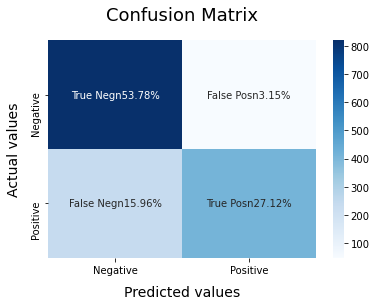

In [67]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

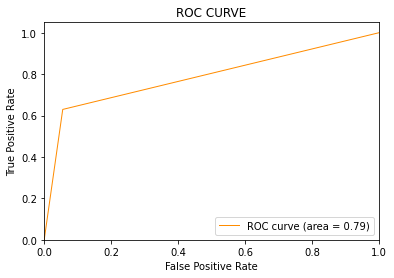

In [68]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' %roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# (2). Linear SVM Model

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       867
           1       0.76      0.73      0.74       656

    accuracy                           0.78      1523
   macro avg       0.78      0.77      0.78      1523
weighted avg       0.78      0.78      0.78      1523



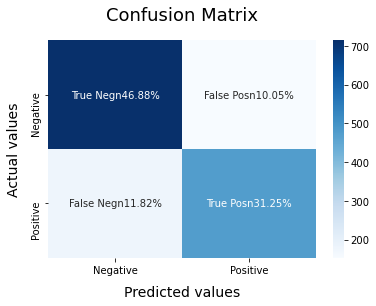

In [69]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

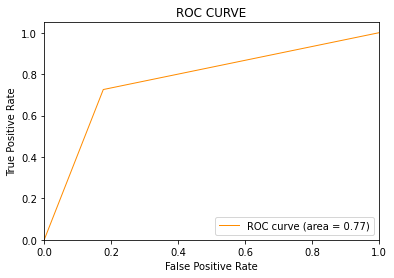

In [70]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' %roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# (3). Logistic Regression Model

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       867
           1       0.80      0.71      0.75       656

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



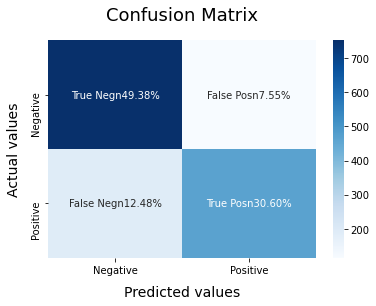

In [71]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

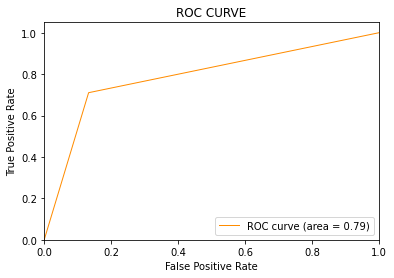

In [72]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' %roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# (4). Multinomial Naive Bayes Model

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       867
           1       0.85      0.66      0.74       656

    accuracy                           0.80      1523
   macro avg       0.82      0.79      0.79      1523
weighted avg       0.81      0.80      0.80      1523



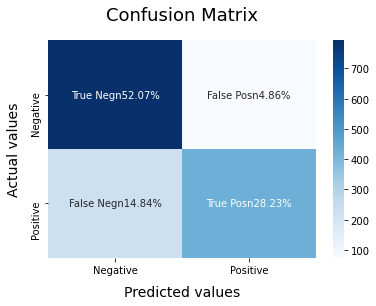

In [73]:
MNBmodel = MultinomialNB()
MNBmodel.fit(X_train, y_train)
model_Evaluate(MNBmodel)
y_pred4 = MNBmodel.predict(X_test)

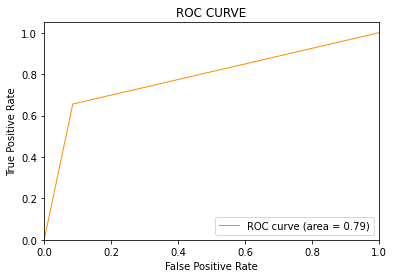

In [74]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred4)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' %roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [75]:
model=BernoulliNB()

In [76]:
model.fit(X_train,y_train)

BernoulliNB()

In [77]:
model.score(X_test,y_test)

0.8089297439264609

In [78]:
pickle.dump(model, open('model.pkl', 'wb'))